<a href="https://colab.research.google.com/github/dyahrosita/Project/blob/main/AlsChick_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

# Import Data

In [ ]:
uploaded = files.upload()

Saving Rekap Al'sChick Expand_Revenue.xlsx to Rekap Al'sChick Expand_Revenue.xlsx


In [ ]:
rev = pd.read_excel([*uploaded][0], 'Revenue')
exp = pd.read_excel([*uploaded][0], 'Expend')
bds = pd.read_excel([*uploaded][0], 'Breakdown Sales') 

# Overview Revenue

In [ ]:
rev.head()

,Year,Month,Period,Category,Flavour,Menu,Menu Clean,Ayam/Bukan,Price,Qty,Revenue
0,2020,Jan,2020-01-01,Ala Carte,Fried Chicken,Dada,Fried Chicken Dada/Paha Atas,Ayam,10000.0,604.0,6040000.0
1,2020,Jan,2020-01-01,Ala Carte,Fried Chicken,Paha Atas,Fried Chicken Dada/Paha Atas,Ayam,10000.0,274.0,2740000.0
2,2020,Jan,2020-01-01,Ala Carte,Fried Chicken,Paha Bawah,Fried Chicken Sayap/Paha Bawah,Ayam,8000.0,397.0,3176000.0
3,2020,Jan,2020-01-01,Ala Carte,Fried Chicken,Sayap,Fried Chicken Sayap/Paha Bawah,Ayam,8000.0,251.0,2008000.0
4,2020,Jan,2020-01-01,Ala Carte,Ayam Geprek,Ayam Geprek Dada/Paha Atas,Ayam Geprek Dada/Paha Atas,Ayam,14000.0,119.0,1666000.0


In [ ]:
rev[rev['Revenue']==0]

,Year,Month,Period,Category,Flavour,Menu,Menu Clean,Ayam/Bukan,Price,Qty,Revenue
6,2020,Jan,2020-01-01,Ala Carte,Geprek Mozzarella,Geprek Mozzarella Dada/Paha Atas,Geprek Mozzarella Dada/Paha Atas,Ayam,19000.0,0.0,0.0
7,2020,Jan,2020-01-01,Ala Carte,Geprek Mozzarella,Geprek Mozzarella Sayap/Paha Atas,Geprek Mozzarella Sayap/Paha Bawah,Ayam,17000.0,0.0,0.0
8,2020,Jan,2020-01-01,Ala Carte,Geprek Keju,Geprek Keju Dada/Paha Atas,Geprek Keju Dada/Paha Atas,Ayam,19000.0,0.0,0.0
9,2020,Jan,2020-01-01,Ala Carte,Geprek Keju,Geprek Keju Sayap/Paha Bawah,Geprek Keju Sayap/Paha Bawah,Ayam,17000.0,0.0,0.0
10,2020,Jan,2020-01-01,Ala Carte,Chicken Cheesy,Chicken Chessy Dada/ Paha Atas,Chicken Cheesy Dada/Paha Atas,Ayam,13000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
869,2021,Jun,2021-06-01,Drink,Drink,Teh Legit,Drink,No,4000.0,0.0,0.0
870,2021,Jun,2021-06-01,Drink,Drink,Teh Pucuk ( 72 ),Drink,No,5000.0,0.0,0.0
871,2021,Jun,2021-06-01,Drink,Drink,Aqua Botol ( 72 ),Drink,No,5000.0,0.0,0.0
872,2021,Jun,2021-06-01,Drink,Drink,Aqua Gelas ( 144 ),Drink,No,1000.0,0.0,0.0


In [ ]:
# drop rows with Revenue = 0
rev.drop(rev[rev['Revenue']==0].index, inplace = True)

## Sales Revenue Trended

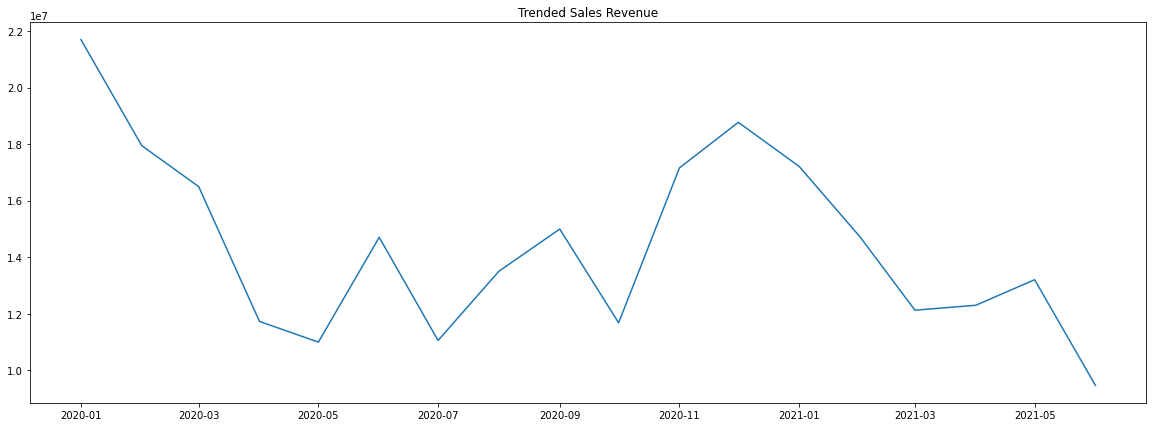

In [ ]:
rev_tren = rev.groupby('Period').sum()['Revenue']

# make line chart
plt.figure(figsize=(20, 7))
plt.title("Trended Sales Revenue")
plt.plot(rev_tren.index, rev_tren)
plt.show()

# Revenue Juni 2021 datanya belum sampai tgl 30. Bisa di drop saja agar tidak merusak gambaran tren

## Trended Revenue by Flavour

In [ ]:
rev.groupby(['Flavour']).sum()['Revenue'].sort_values(ascending=False).head(5)

Flavour
Fried Chicken    212777000.0
Ayam Geprek       37747000.0
Spicy Chicken      2745000.0
Chicken Pop        1847000.0
BBQ                1539000.0
Name: Revenue, dtype: float64

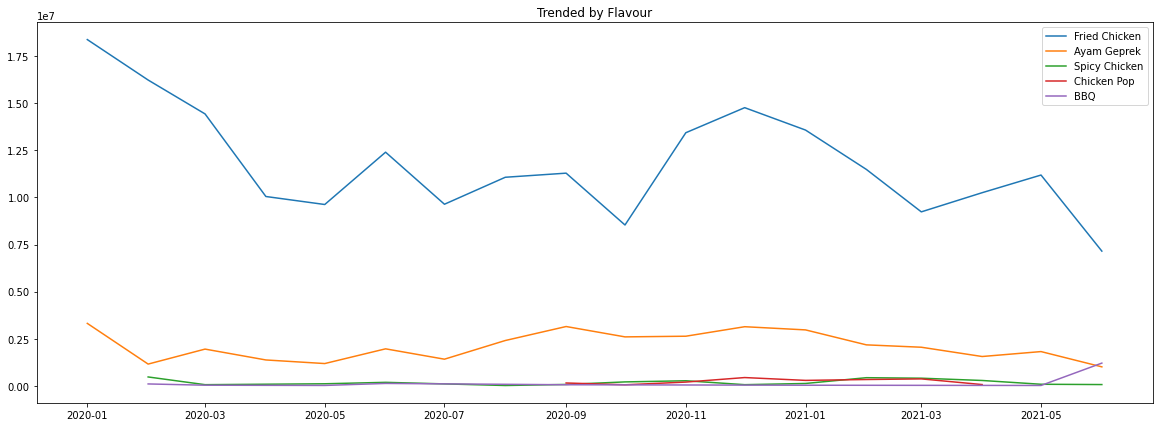

In [ ]:
fc = rev[rev['Flavour']=='Fried Chicken'].groupby('Period').sum()['Revenue']
ag = rev[rev['Flavour']=='Ayam Geprek'].groupby('Period').sum()['Revenue']
sc = rev[rev['Flavour']=='Spicy Chicken'].groupby('Period').sum()['Revenue']
cp = rev[rev['Flavour']=='Chicken Pop'].groupby('Period').sum()['Revenue']
bbq = rev[rev['Flavour']=='BBQ'].groupby('Period').sum()['Revenue']

plt.figure(figsize=(20, 7))
plt.title("Trended by Flavour")
plt.plot(fc.index, fc, label='Fried Chicken')
plt.plot(ag.index, ag, label='Ayam Geprek')
plt.plot(sc.index, sc, label='Spicy Chicken')
plt.plot(cp.index, cp, label='Chicken Pop')
plt.plot(bbq.index, bbq, label='BBQ')
plt.legend()
plt.show()

## Trended Revenue by Menu

In [ ]:
rev_menu = rev.groupby(['Menu Clean']).sum()['Revenue'].sort_values(ascending=True).tail(5)

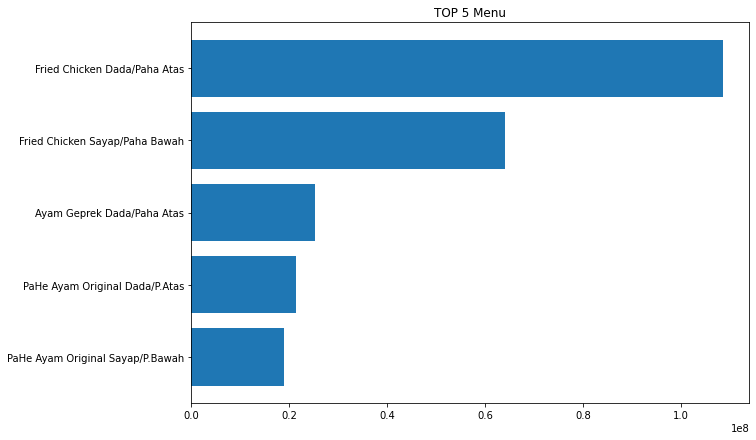

In [ ]:
# make line chart
plt.figure(figsize=(10, 7))
plt.title("TOP 5 Menu")
plt.barh(rev_menu.index, rev_menu)
plt.show()

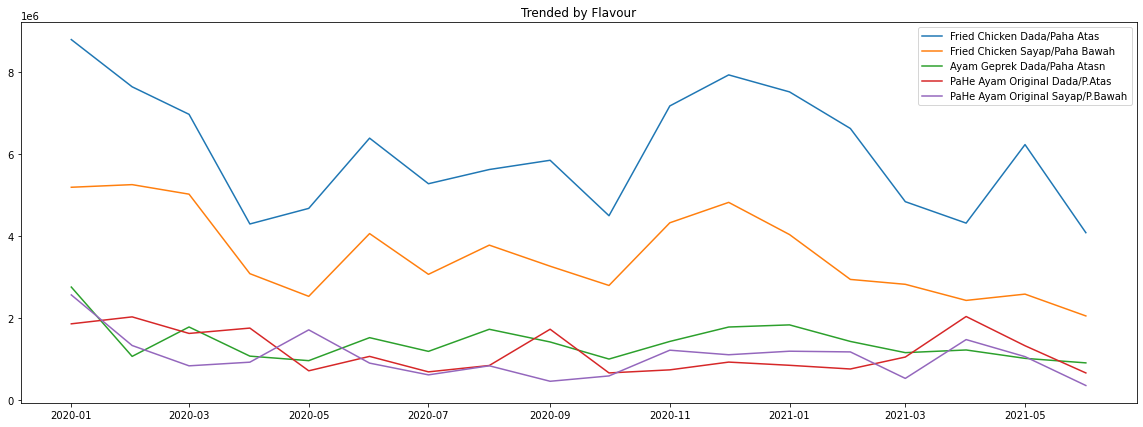

In [ ]:
fc_d = rev[rev['Menu Clean']=='Fried Chicken Dada/Paha Atas'].groupby('Period').sum()['Revenue']
fc_s = rev[rev['Menu Clean']=='Fried Chicken Sayap/Paha Bawah'].groupby('Period').sum()['Revenue']
ag_d = rev[rev['Menu Clean']=='Ayam Geprek Dada/Paha Atas'].groupby('Period').sum()['Revenue']
ph_fc_d = rev[rev['Menu Clean']=='PaHe Ayam Original Dada/P.Atas'].groupby('Period').sum()['Revenue']
ph_fc_s = rev[rev['Menu Clean']=='PaHe Ayam Original Sayap/P.Bawah'].groupby('Period').sum()['Revenue']

plt.figure(figsize=(20, 7))
plt.title("Trended by Flavour")
plt.plot(fc_d.index, fc_d, label='Fried Chicken Dada/Paha Atas')
plt.plot(fc_s.index, fc_s, label='Fried Chicken Sayap/Paha Bawah')
plt.plot(ag_d.index, ag_d, label='Ayam Geprek Dada/Paha Atasn')
plt.plot(ph_fc_d.index, ph_fc_d, label='PaHe Ayam Original Dada/P.Atas')
plt.plot(ph_fc_s.index, ph_fc_s, label='PaHe Ayam Original Sayap/P.Bawah')
plt.legend()
plt.show()

# Overview Expend

In [ ]:
exp.head()

,Month,Year,Period,Category,Expend2,Expend,Harga,Total Qty,Expen MTD
0,Jan,2020,2020-01-01,bahan baku,Ayam,Ayam,42000.0,247.0,10374000.0
1,Jan,2020,2020-01-01,bahan baku,Ayam,Sayap,35000.0,0.0,0.0
2,Jan,2020,2020-01-01,bahan baku,Tepung,Tepung,20000.0,122.0,2440000.0
3,Jan,2020,2020-01-01,bahan baku,Minyak,Minyak,16000.0,61.0,976000.0
4,Jan,2020,2020-01-01,bahan baku,Saos Cabe/ Tomat,Saos Cabe,6500.0,79.0,645500.0


In [ ]:
exp[exp['Expen MTD']==0]

,Month,Year,Period,Category,Expend2,Expend,Harga,Total Qty,Expen MTD
1,Jan,2020,2020-01-01,bahan baku,Ayam,Sayap,35000.0,0.0,0.0
5,Jan,2020,2020-01-01,bahan baku,Saos Cabe/ Tomat,Saos Tomat,6000.0,0.0,0.0
8,Jan,2020,2020-01-01,packaging,Cup,Cup,400.0,0.0,0.0
12,Jan,2020,2020-01-01,bahan baku,Mozarella,Mozarella,2000.0,0.0,0.0
13,Jan,2020,2020-01-01,peralatan kebersihan,Sarung Tangan,Sarung Tangam,15000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1183,Jun,2021,2021-06-01,Spoilage,Chicken pop,Chicken Pop,6000.0,0.0,0.0
1184,Jun,2021,2021-06-01,Spoilage,Nasi,Nasi,4000.0,0.0,0.0
1185,Jun,2021,2021-06-01,Spoilage,Kentang,Kentang,6000.0,0.0,0.0
1188,Jun,2021,2021-06-01,Opex,Gaji / Bonus,Kasbon,NaN,NaN,0.0


In [ ]:
# drop rows with Expen MTD = 0
exp.drop(exp[exp['Expen MTD']==0].index, inplace = True)

## Trended Expenditure

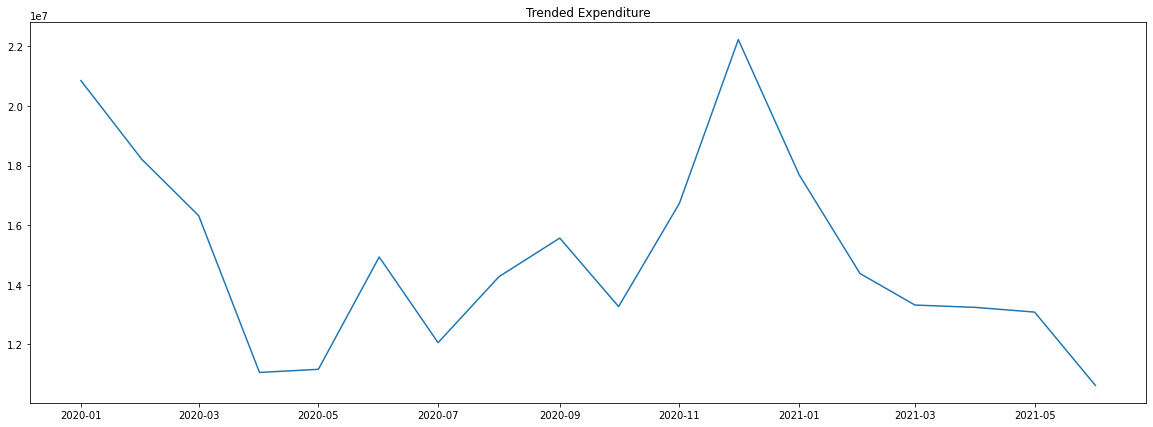

In [ ]:
exp_tren = exp[exp['Expend']!='Kasbon'].groupby('Period').sum()['Expen MTD']

# make line chart
plt.figure(figsize=(20, 7))
plt.title("Trended Expenditure")
plt.plot(exp_tren.index, exp_tren)
plt.show()

# Expenditure Juni 2021 datanya belum sampai tgl 30. Bisa di drop saja agar tidak merusak gambaran tren

## TOP 5 Expenditure

In [ ]:
exp['Category'] = exp['Category'].str.replace('opex','Opex')

In [ ]:
exp_top = exp.groupby(['Category']).sum()['Expen MTD'].sort_values(ascending=True).tail(5)

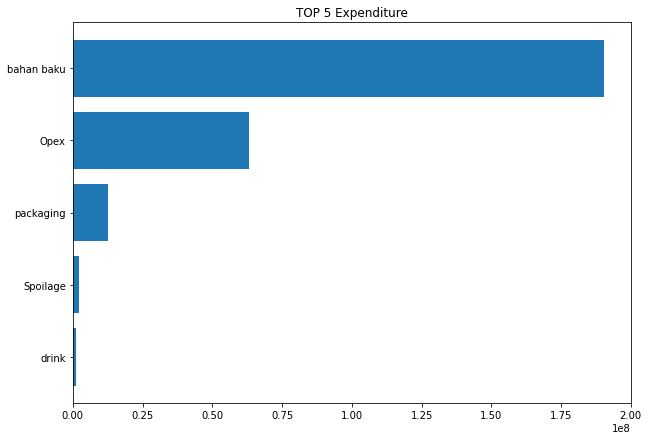

In [ ]:
# make line chart
plt.figure(figsize=(10, 7))
plt.title("TOP 5 Expenditure")
plt.barh(exp_top.index, exp_top)
plt.show()

## Breakdown Expenditure by Bahan Baku

In [ ]:
exp['Expend2'] = exp['Expend2'].str.replace('Minyak Beku','Minyak').replace('Minyak Goreng','Minyak')
exp['Expend2'] = exp['Expend2'].str.replace('cabe','sambel geprek').replace('Cabe rawit','sambel geprek').replace('Cabe','sambel geprek')
exp['Expend2'] = exp['Expend2'].str.replace('Beras','Beras/ nasi').replace('Nasi', 'Beras/ nasi').replace('beras','Beras/ nasi')
exp['Expend2'] = exp['Expend2'].str.replace('Saos Cabe', 'Saos Cabe/Tomat').replace('Saos Tomat', 'Saos Cabe/Tomat')

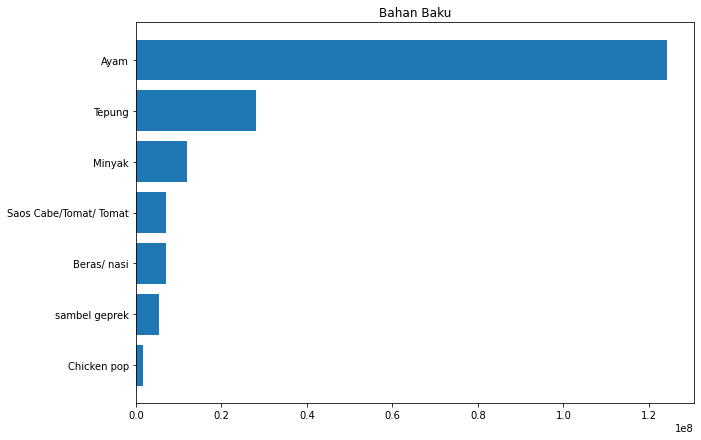

In [ ]:
bhn_baku = exp[exp['Category']=='bahan baku'].groupby(['Expend2']).sum()['Expen MTD']
bhn_baku = bhn_baku.sort_values(ascending=True).tail(7)

# make line chart
plt.figure(figsize=(10, 7))
plt.title("Bahan Baku")
plt.barh(bhn_baku.index, bhn_baku)
plt.show()

## Trended Expanditure by Bahan Baku

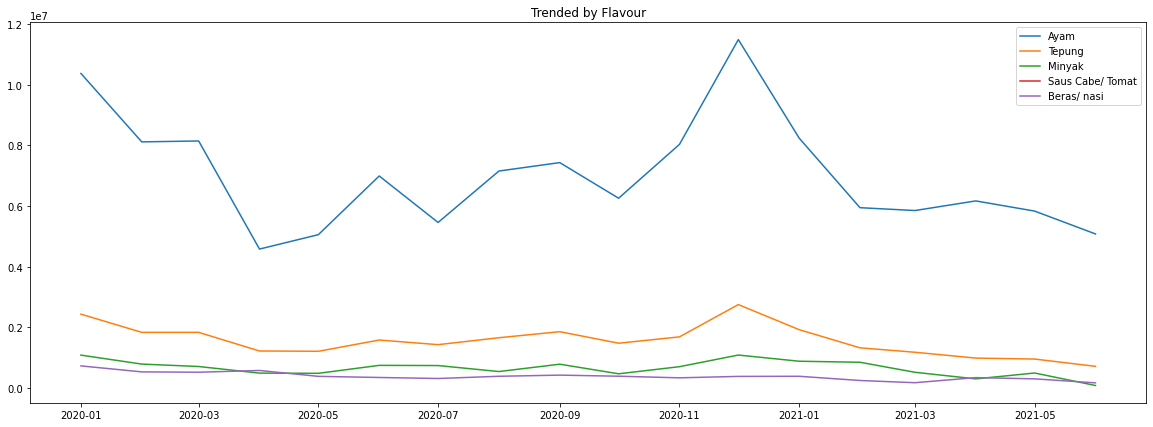

In [ ]:
ayam = exp[exp['Expend2']=='Ayam'].groupby('Period').sum()['Expen MTD']
tepung = exp[exp['Expend2']=='Tepung'].groupby('Period').sum()['Expen MTD']
minyak = exp[exp['Expend2']=='Minyak'].groupby('Period').sum()['Expen MTD']
saus = exp[exp['Expend2']=='Saos Cabe/Tomat'].groupby('Period').sum()['Expen MTD']
beras = exp[exp['Expend2']=='Beras/ nasi'].groupby('Period').sum()['Expen MTD']

plt.figure(figsize=(20, 7))
plt.title("Trended by Flavour")
plt.plot(ayam.index, ayam, label='Ayam')
plt.plot(tepung.index, tepung, label='Tepung')
plt.plot(minyak.index, minyak, label='Minyak')
plt.plot(saus.index, saus, label='Saus Cabe/ Tomat')
plt.plot(beras.index, beras, label='Beras/ nasi')
plt.legend()
plt.show()

## Breakdown Expenditure by Opex

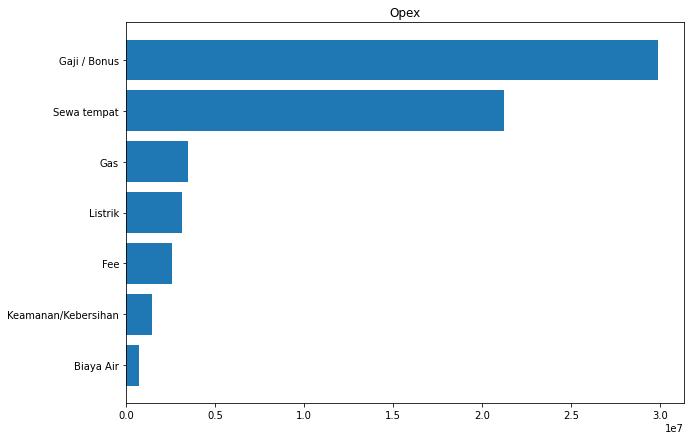

In [ ]:
opex = exp[exp['Category']=='Opex'].groupby(['Expend2']).sum()['Expen MTD']
opex = opex.sort_values(ascending=True).tail(7)

# make line chart
plt.figure(figsize=(10, 7))
plt.title("Opex")
plt.barh(opex.index, opex)
plt.show()

## Opex Trended
> Ada 2x kenaikan biaya sewa tempat dalam 1 tahun terakhir

> Ada expend Fee untuk apa saja?

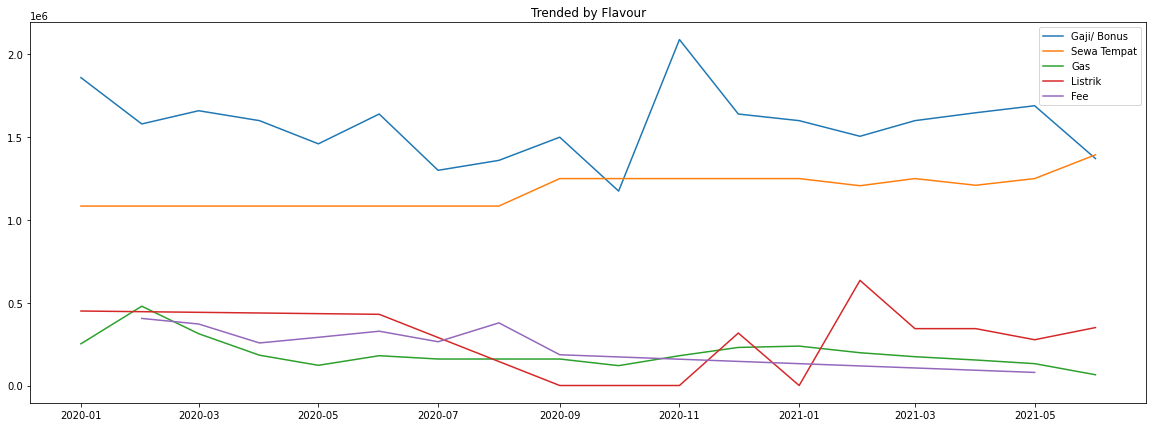

In [ ]:
gaji = exp[(exp['Expend2']=='Gaji / Bonus') & (exp['Expend']!='Kasbon')].groupby('Period').sum()['Expen MTD']
sewa = exp[exp['Expend2']=='Sewa tempat'].groupby('Period').sum()['Expen MTD']
gas = exp[exp['Expend2']=='Gas'].groupby('Period').sum()['Expen MTD']
listrik = exp[exp['Expend2']=='Listrik'].groupby('Period').sum()['Expen MTD']
fee = exp[exp['Expend2']=='Fee'].groupby('Period').sum()['Expen MTD']

plt.figure(figsize=(20, 7))
plt.title("Trended by Flavour")
plt.plot(gaji.index, gaji, label='Gaji/ Bonus')
plt.plot(sewa.index, sewa, label='Sewa Tempat')
plt.plot(gas.index, gas, label='Gas')
plt.plot(listrik.index, listrik, label='Listrik')
plt.plot(fee.index, fee, label='Fee')
plt.legend()
plt.show()

#Overview Data Sales Breakdown by DayName & Date

In [ ]:
bds.head()

,Year,DateMounthYear,Mounth,DayName,Date,Total sales
0,2020,2020-01-01,January,Wednesday,1,167
1,2020,2020-01-02,January,Thursday,2,0
2,2020,2020-01-03,January,Friday,3,185
3,2020,2020-01-04,January,Saturday,4,64
4,2020,2020-01-05,January,Sunday,5,67


## Tren berdasarkan nama hari

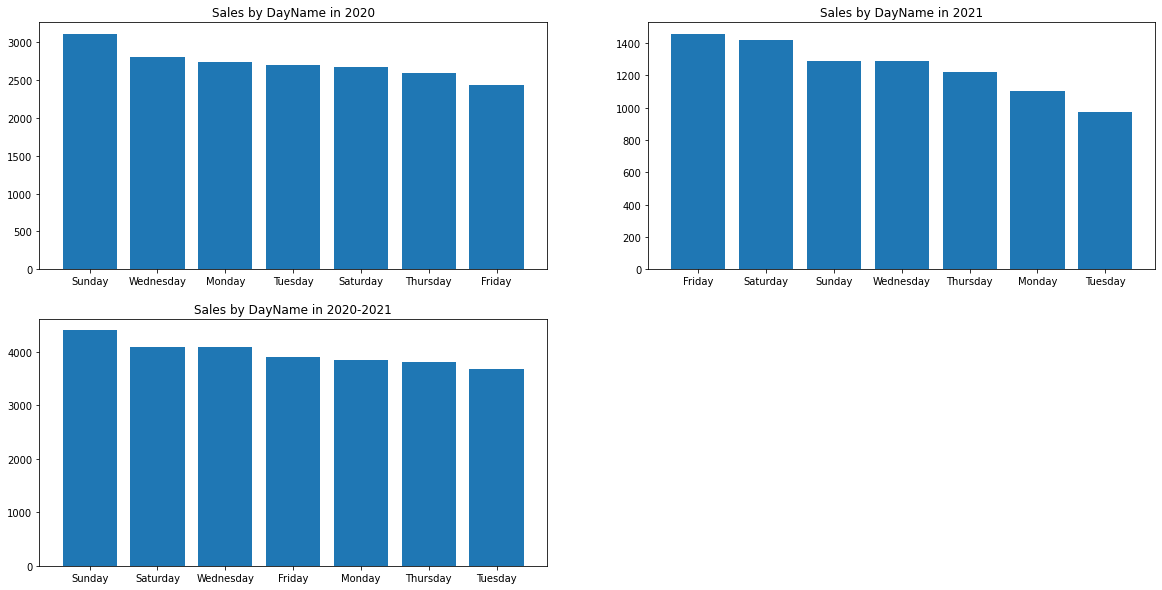

In [ ]:
DayName20 = bds[bds['Year']==2020].groupby(['DayName']).sum()['Total sales'].sort_values(ascending=False)
DayName21 = bds[bds['Year']==2021].groupby(['DayName']).sum()['Total sales'].sort_values(ascending=False)
DayName = bds.groupby(['DayName']).sum()['Total sales'].sort_values(ascending=False)

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Sales by DayName in 2020")
plt.bar(DayName20.index, DayName20)

plt.subplot(2, 2, 2)
plt.title("Sales by DayName in 2021")
plt.bar(DayName21.index, DayName21)

plt.subplot(2, 2, 3)
plt.title("Sales by DayName in 2020-2021")
plt.bar(DayName.index, DayName)

plt.show()

## Tren berdasarkan tanggal
> Tren penjualan di tanggal muda terlihat lebih tinggi daripada akhir bulan





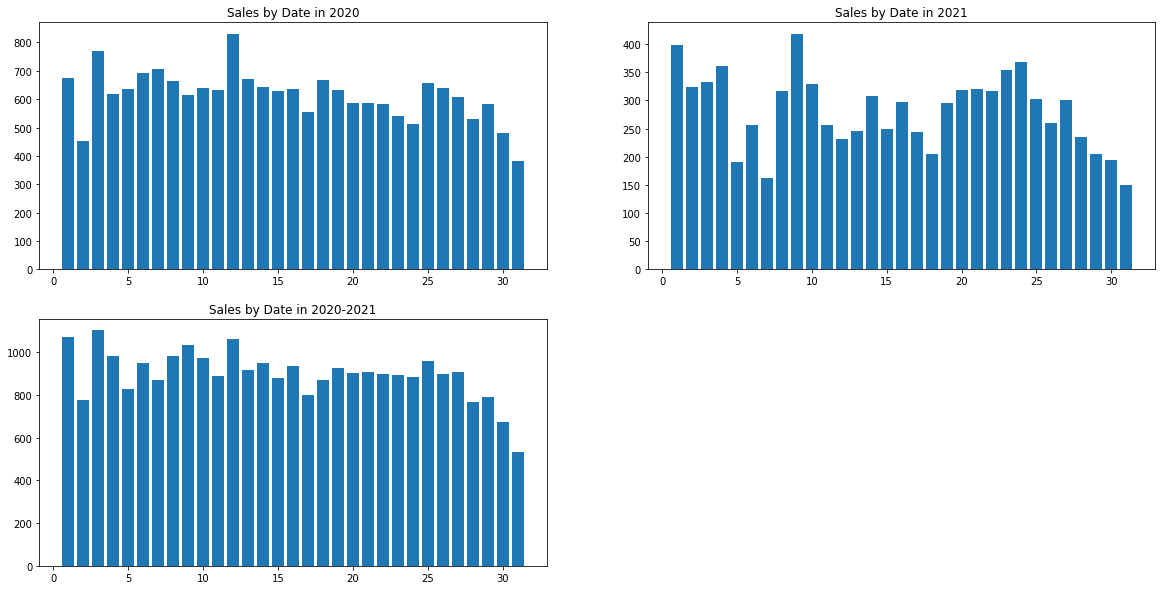

In [ ]:
Date20 = bds[bds['Year']==2020].groupby(['Date']).sum()['Total sales'].sort_values(ascending=False)
Date21 = bds[bds['Year']==2021].groupby(['Date']).sum()['Total sales'].sort_values(ascending=False)
Date = bds.groupby(['Date']).sum()['Total sales'].sort_values(ascending=False)

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Sales by Date in 2020")
plt.bar(Date20.index, Date20)

plt.subplot(2, 2, 2)
plt.title("Sales by Date in 2021")
plt.bar(Date21.index, Date21)

plt.subplot(2, 2, 3)
plt.title("Sales by Date in 2020-2021")
plt.bar(Date.index, Date)

plt.show()

# Profit Overview

In [ ]:
col1 = pd.DataFrame(rev_tren).reset_index()
col2 = pd.DataFrame(exp_tren).reset_index()
profit = pd.concat([col1, col2['Expen MTD']], axis=1)
profit['Profit'] = profit['Revenue']-profit['Expen MTD']
profit = profit.drop(['Revenue','Expen MTD'], axis=1)
profit

,Period,Profit
0,2020-01-01,8.434750e+05
1,2020-02-01,-2.690700e+05
2,2020-03-01,1.685310e+05
3,2020-04-01,6.336800e+05
4,2020-05-01,-1.729300e+05
5,2020-06-01,-2.301850e+05
6,2020-07-01,-1.007350e+06
7,2020-08-01,-7.723600e+05
8,2020-09-01,-6.567778e+05
9,2020-10-01,-1.714000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


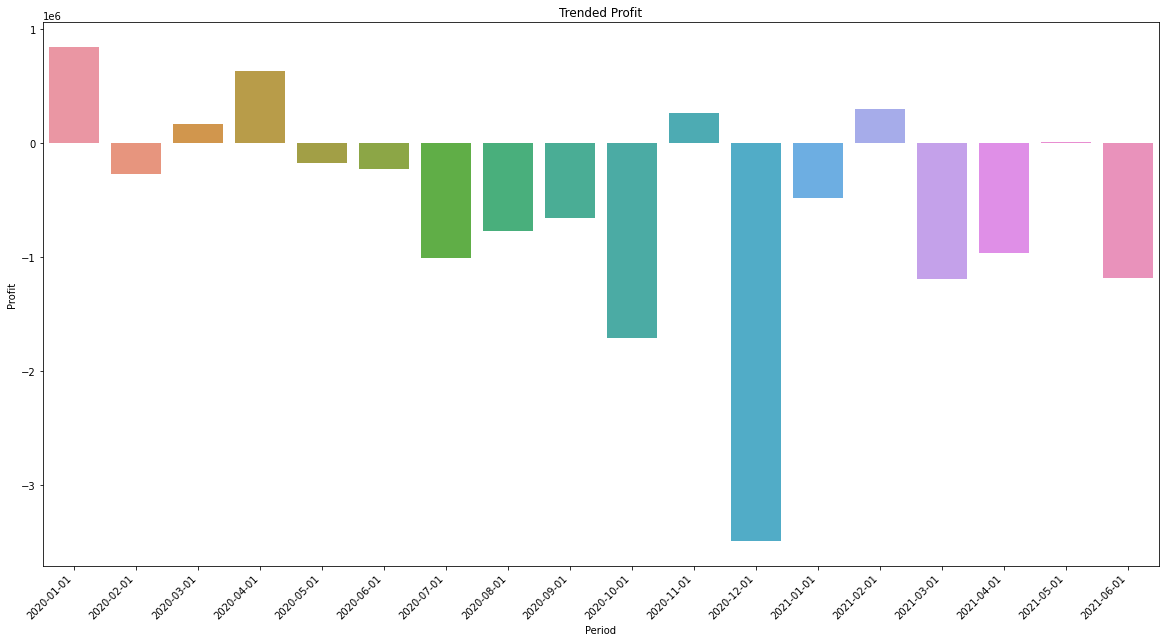

In [ ]:
# make line chart
x_dates = profit['Period'].dt.strftime('%Y-%m-%d').sort_values().unique()
plt.figure(figsize=(20, 10))
plt.title("Trended Profit")
sns.barplot(profit['Period'], profit['Profit']).set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()
# Profit di Nov'20 karena ada unsur Gaji tidak dimasukkan ke OPEX


In [ ]:
rev[(rev['Year']==2021)&(rev['Month']=='Feb')]

,Year,Month,Period,Category,Flavour,Menu,Menu Clean,Ayam/Bukan,Price,Qty,Revenue
558,2021,Feb,2021-02-01,Ala Carte,Fried Chicken,Dada,Fried Chicken Dada/Paha Atas,Ayam,9000.0,382.0,3438000.0
559,2021,Feb,2021-02-01,Ala Carte,Fried Chicken,Paha Atas,Fried Chicken Dada/Paha Atas,Ayam,9000.0,353.0,3177000.0
560,2021,Feb,2021-02-01,Ala Carte,Fried Chicken,Paha Bawah,Fried Chicken Sayap/Paha Bawah,Ayam,7000.0,223.0,1561000.0
561,2021,Feb,2021-02-01,Ala Carte,Fried Chicken,Sayap,Fried Chicken Sayap/Paha Bawah,Ayam,7000.0,197.0,1379000.0
562,2021,Feb,2021-02-01,Ala Carte,Ayam Geprek,Ayam Geprek Dada orginal,Ayam Geprek Dada/Paha Atas,Ayam,13000.0,110.0,1430000.0
564,2021,Feb,2021-02-01,Ala Carte,Ayam Geprek,Geprek Sayap original,Ayam Geprek Sayap/Paha Bawah,Ayam,10000.0,37.0,370000.0
568,2021,Feb,2021-02-01,Ala Carte,Chicken Cheesy,Chicken Chessy (Dada/P. Atas),Chicken Cheesy Dada/Paha Atas,Ayam,12000.0,8.0,96000.0
569,2021,Feb,2021-02-01,Ala Carte,Chicken Cheesy,Chicken Chessy (Sayap/P. Bawah),Chicken Chessy Sayap/ Paha bawah,Ayam,10000.0,2.0,20000.0
570,2021,Feb,2021-02-01,Ala Carte,Spicy Chicken,Spicy Chicken Dada/P. Atas,Spicy Chicken Dada/P. Atas,Ayam,12000.0,25.0,300000.0
571,2021,Feb,2021-02-01,Ala Carte,Spicy Chicken,Spicy Chicken Sayap/P. Bawah,Spicy Chicken Sayap/P. Bawah,Ayam,10000.0,8.0,80000.0


# 1. Bagaimana meningkatkan profit?
Tunjukkan Top 5 High demand product x high profit

In [ ]:
high_demand = rev.groupby(['Menu Clean']).sum()['Qty']
high_demand = high_demand.sort_values(ascending=True).tail(5)

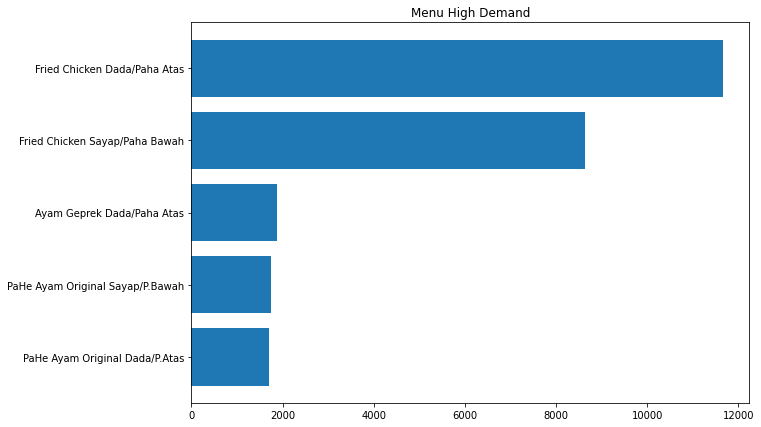

In [ ]:
# make line chart
plt.figure(figsize=(10, 7))
plt.title("Menu High Demand")
plt.barh(high_demand.index, high_demand)
plt.show()

In [ ]:
# Data Profit by Flavour

x = ['Ala Carte', 'Ala Carte', 'Ala Carte','Ala Carte','Ala Carte','Ala Carte','Ala Carte','Ala Carte','Ala Carte','Ala Carte','Paket','Paket']
y = ['Ayam Geprek','BBQ','Chicken Cheesy','Chicken Pop','Fried Chicken','Geprek Keju','Geprek Mozzarella','Kulit','Nasi','Spicy Chicken','Ayam Geprek','Fried Chicken']
z = [3608,3111,1662,-809,2915,7063,5798,-2168,1905,3070,2711,2701]

profit_flavour = pd.DataFrame(list(zip(x, y, z)),
               columns =['category', 'flavour', 'profit'])
profit_flavour = profit_flavour.sort_values('profit', ascending=False).reset_index(drop=True)
profit_flavour
# Geprek Keju tidak dipakai karena tidak ada Keju di data Expenditure
# Geprek Mozarella juga tidak dipakai karena hanya 3000 dimana harganya agak kurang masuk akal

,category,flavour,profit
0,Ala Carte,Geprek Keju,7063
1,Ala Carte,Geprek Mozzarella,5798
2,Ala Carte,Ayam Geprek,3608
3,Ala Carte,BBQ,3111
4,Ala Carte,Spicy Chicken,3070
5,Ala Carte,Fried Chicken,2915
6,Paket,Ayam Geprek,2711
7,Paket,Fried Chicken,2701
8,Ala Carte,Nasi,1905
9,Ala Carte,Chicken Cheesy,1662


#2. Mengurangi cost:
Tunjukkan product dg kemungkinan spoilage tinggi, dan kurangi cost di spoiledge

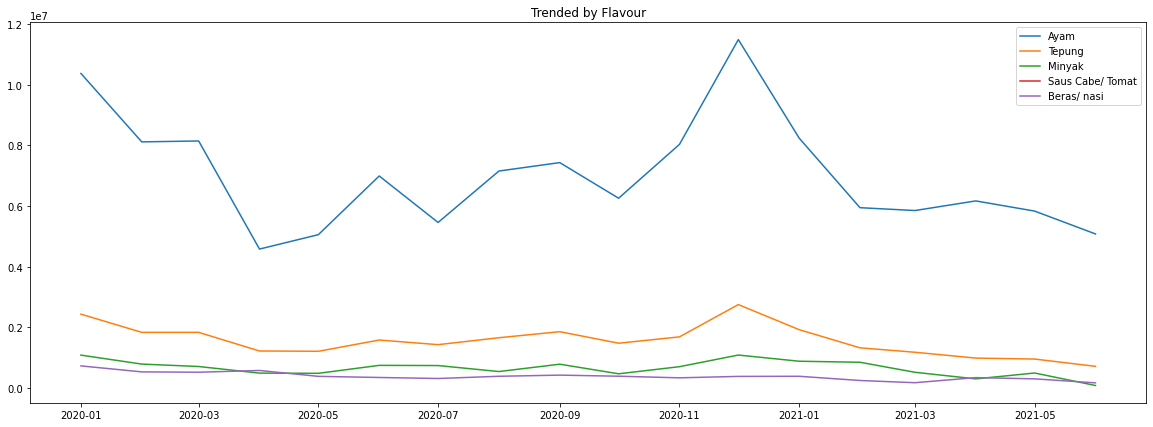

In [ ]:
ayam = exp[exp['Expend2']=='Ayam'].groupby('Period').sum()['Expen MTD']
tepung = exp[exp['Expend2']=='Tepung'].groupby('Period').sum()['Expen MTD']
minyak = exp[exp['Expend2']=='Minyak'].groupby('Period').sum()['Expen MTD']
saus = exp[exp['Expend2']=='Saos Cabe/Tomat'].groupby('Period').sum()['Expen MTD']
beras = exp[exp['Expend2']=='Beras/ nasi'].groupby('Period').sum()['Expen MTD']

plt.figure(figsize=(20, 7))
plt.title("Trended by Flavour")
plt.plot(ayam.index, ayam, label='Ayam')
plt.plot(tepung.index, tepung, label='Tepung')
plt.plot(minyak.index, minyak, label='Minyak')
plt.plot(saus.index, saus, label='Saus Cabe/ Tomat')
plt.plot(beras.index, beras, label='Beras/ nasi')
plt.legend()
plt.show()

In [ ]:
spoilage = exp[exp['Category']=='Spoilage'].groupby(['Expend']).sum()['Expen MTD']
spoilage = spoilage.sort_values(ascending=True).tail(5)

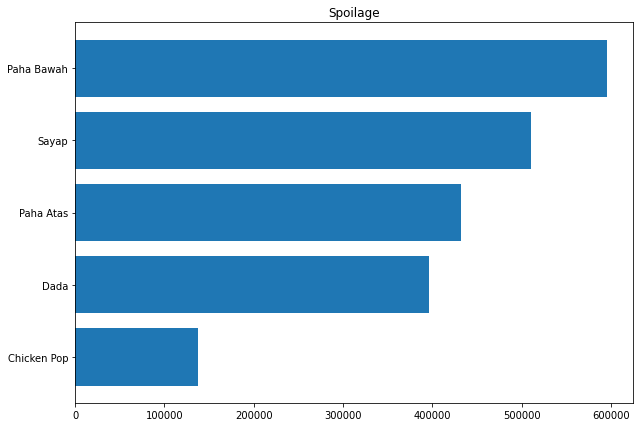

In [ ]:
# make line chart
plt.figure(figsize=(10, 7))
plt.title("Spoilage")
plt.barh(spoilage.index, spoilage)
plt.show()

# 3. High demand tidak?
Penjualan per bulan/qty

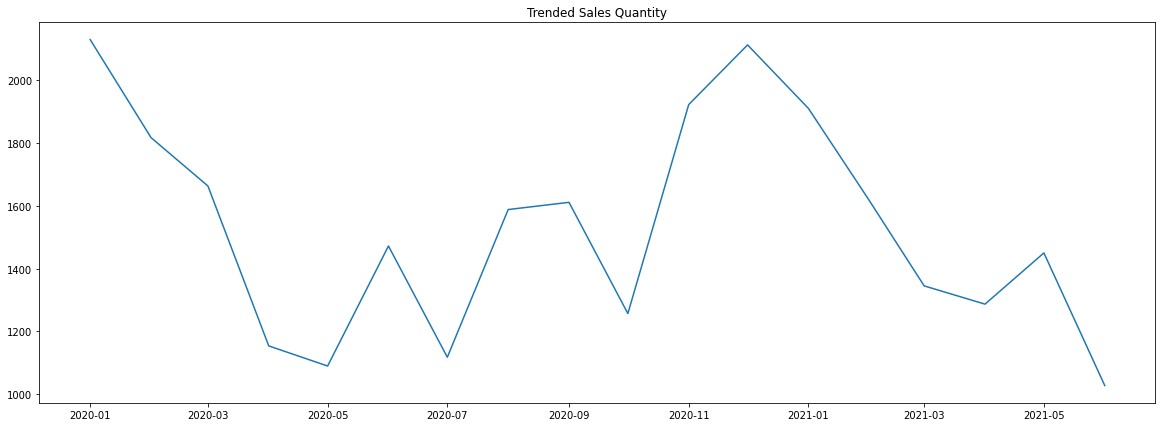

In [ ]:
qty_tren = rev[rev['Ayam/Bukan']=='Ayam'].groupby('Period').sum()['Qty']

# make line chart
plt.figure(figsize=(20, 7))
plt.title("Trended Sales Quantity")
plt.plot(qty_tren.index, qty_tren)
plt.show()

# Note: Qty di bulan Jun'21 masih belum sampai akhir bulan

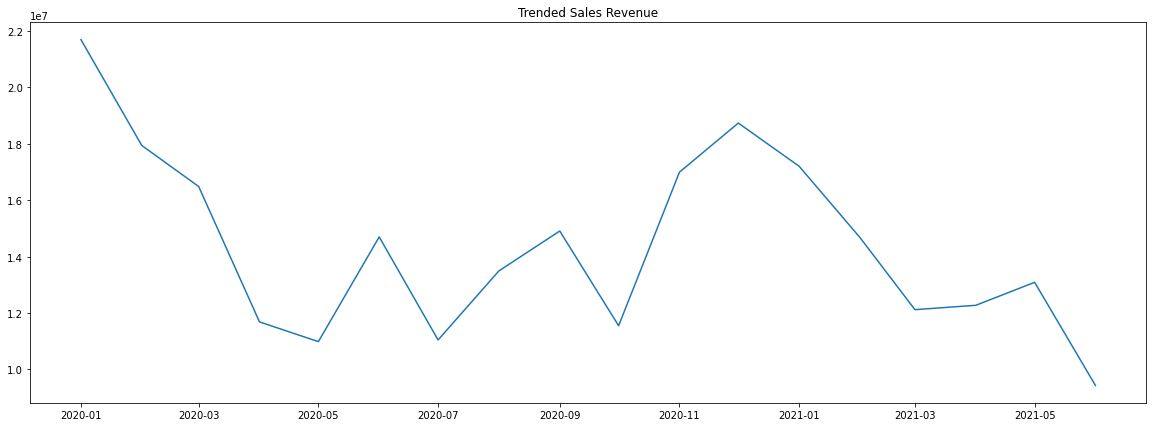

In [ ]:
rev_tren = rev[rev['Ayam/Bukan']=='Ayam'].groupby('Period').sum()['Revenue']

# make line chart
plt.figure(figsize=(20, 7))
plt.title("Trended Sales Revenue")
plt.plot(rev_tren.index, rev_tren)
plt.show()

# Note: Revenue di bulan Jun'21 masih belum sampai akhir bulan

# 4. Produk apa yg mungkin high demand?
Bisa dengan pendekatan quantity atau kohort

In [ ]:
high_demand = rev.groupby(['Menu Clean']).sum()['Qty']
high_demand = high_demand.sort_values(ascending=True).tail(5)

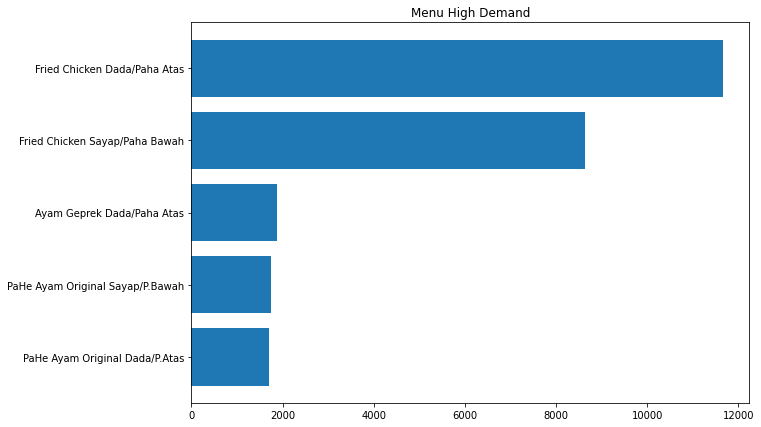

In [ ]:
# make line chart
plt.figure(figsize=(10, 7))
plt.title("Menu High Demand")
plt.barh(high_demand.index, high_demand)
plt.show()